In [ ]:
# !pip install gensim

In [1]:
import pandas as pd
import numpy as np
from numpy import dot 
from numpy.linalg import norm

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from gensim.models import Word2Vec
import logging
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

import random
from sklearn.manifold import TSNE

In [2]:
# The dataset I used for this tutorial is from Kaggle Dataset( https://www.kaggle.com/CooperUnion/cardataset)
# This cars dataset includes features such as make, model, year, engine, and other properties of the car.
# We will use these features to generate the word embeddings for each make model and then compare the similarities between different make model.
# The following dataframe shows the detail information of this dataset.

df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# Create a new column for Make Model
df['Maker_Model']= df['Make']+ " " + df['Model']
df['Maker_Model']

0        BMW 1 Series M
1          BMW 1 Series
2          BMW 1 Series
3          BMW 1 Series
4          BMW 1 Series
              ...      
11909         Acura ZDX
11910         Acura ZDX
11911         Acura ZDX
11912         Acura ZDX
11913    Lincoln Zephyr
Name: Maker_Model, Length: 11914, dtype: object

In [4]:
# Select features from original dataset to form a new dataframe 
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]
df1.head()

,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,Maker_Model
0,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,BMW 1 Series M
1,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,BMW 1 Series
2,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,BMW 1 Series
3,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,BMW 1 Series
4,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible,BMW 1 Series


In [6]:
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1) 
df2.head()

0    premium unleaded (required),MANUAL,rear wheel ...
1    premium unleaded (required),MANUAL,rear wheel ...
2    premium unleaded (required),MANUAL,rear wheel ...
3    premium unleaded (required),MANUAL,rear wheel ...
4    premium unleaded (required),MANUAL,rear wheel ...
dtype: object

In [8]:
# Store them in the pandas dataframe
df_clean = pd.DataFrame({'clean': df2}) 
df_clean

,clean
0,"premium unleaded (required),MANUAL,rear wheel ..."
1,"premium unleaded (required),MANUAL,rear wheel ..."
2,"premium unleaded (required),MANUAL,rear wheel ..."
3,"premium unleaded (required),MANUAL,rear wheel ..."
4,"premium unleaded (required),MANUAL,rear wheel ..."
...,...
11909,"premium unleaded (required),AUTOMATIC,all whee..."
11910,"premium unleaded (required),AUTOMATIC,all whee..."
11911,"premium unleaded (required),AUTOMATIC,all whee..."
11912,"premium unleaded (recommended),AUTOMATIC,all w..."


In [9]:
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]
# show the example of list of list format of the custom corpus for gensim modeling 
print(sent[:2])

[['premium unleaded (required)', 'MANUAL', 'rear wheel drive', 'Factory Tuner', 'Luxury', 'High-Performance', 'Compact', 'Coupe', 'BMW 1 Series M'], ['premium unleaded (required)', 'MANUAL', 'rear wheel drive', 'Luxury', 'Performance', 'Compact', 'Convertible', 'BMW 1 Series']]


In [11]:
## Training our model
model = Word2Vec(sent, min_count=1,vector_size= 50,workers=3, window =3, sg = 1)
# size: The number of dimensions of the embeddings and the default is 100.
# window: The maximum distance between a target word and words around the target word. The default window is 5.
# min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
# workers: The number of partitions during training and the default workers is 3.
# sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

print(model.wv['Toyota Camry'])
print("-"*20)
print(model.wv.similarity('Porsche 718 Cayman', 'Nissan Van')) #lower similarity.. 
print("-"*20)
print(model.wv.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class')) #higher here..
print("-"*20)
## Show the most similar vehicles for Mercedes-Benz SLK-Class : Default by eculidean distance 
print(model.wv.most_similar('Mercedes-Benz SLK-Class')[:5])
print("-"*20)
## Show the most similar vehicles for Toyota Camry : Default by eculidean distance 
print(model.wv.most_similar('Toyota Camry')[:5])


INFO - 16:48:11: collecting all words and their counts
INFO - 16:48:11: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:48:11: PROGRESS: at sentence #10000, processed 74060 words, keeping 841 word types
INFO - 16:48:11: collected 977 word types from a corpus of 88129 raw words and 11914 sentences
INFO - 16:48:11: Creating a fresh vocabulary
INFO - 16:48:11: Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 977 unique words (100.0%% of original 977, drops 0)', 'datetime': '2022-01-20T16:48:11.494887', 'gensim': '4.1.2', 'python': '3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
INFO - 16:48:11: Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 88129 word corpus (100.0%% of original 88129, drops 0)', 'datetime': '2022-01-20T16:48:11.496710', 'gensim': '4.1.2', 'python': '3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64

[-0.02059283  0.12953869  0.01795671 -0.09821158 -0.05537676 -0.19387297
  0.00412719  0.27992713 -0.09601965 -0.05764231  0.0499728   0.01112248
  0.08432603 -0.03194216 -0.04966038  0.16750191  0.14329666  0.2853058
 -0.1151455  -0.2686037  -0.06429893 -0.03201343  0.22172     0.05943532
  0.2124181  -0.00552481 -0.03776629  0.3685229  -0.04652989 -0.03445982
 -0.00538578  0.03227708  0.01990923  0.02734303  0.06588138 -0.08675511
  0.19565637 -0.04026257  0.05190259  0.05346384  0.08148345 -0.02915381
 -0.20080046  0.07672051  0.32736653  0.04358794 -0.02214038 -0.15503402
 -0.00835347  0.04892128]
--------------------
0.8019434
--------------------
0.9317117
--------------------
[('Audi S3', 0.9932534098625183), ('Porsche Boxster', 0.990922749042511), ('Nissan GT-R', 0.9902020692825317), ('BMW M6', 0.9901003241539001), ('Mercedes-Benz SLR McLaren', 0.9895845651626587)]
--------------------
[('Dodge Dart', 0.9886654615402222), ('Oldsmobile Alero', 0.986647367477417), ('Nissan Sentra

In [12]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model[item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

Maker_Model = list(df.Maker_Model.unique()) ## only get the unique Maker_Model_Year
## Show the most similar Mercedes-Benz SLK-Class by cosine distance 
print(cosine_distance (model.wv,'Mercedes-Benz SLK-Class',Maker_Model,5))

[('Audi S3', 0.99325347), ('Porsche Boxster', 0.9909228), ('Nissan GT-R', 0.99020207), ('BMW M6', 0.99010026), ('Mercedes-Benz SLR McLaren', 0.9895846)]


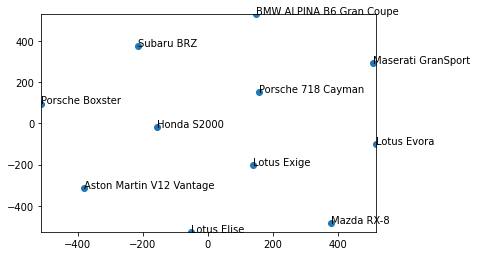

In [13]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    
display_closestwords_tsnescatterplot(model.wv, 'Porsche 718 Cayman', 50)  